# Project: Investigate a Dataset - No-show appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment.

The dataset contains the following columns names that are important for our data analysis,
    
   1. `ScheduledDay` tells us on what day the patient set up their appointment.
   2. `Neighborhood` indicates the location of the hospital.
   3. `Scholarship` indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.
   4. `gender`
   5. `age`
   6. `Neighbourhood`
   7. `No-show:` indicates whether the patient show up for scheduled appointment or not.  it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.
    


### Question(s) for Analysis
>Does **Age** affect patient showing up for appointment?

> Does **Gender** affect pateint showing up for appointment?

In [2]:
# import packages to use
import pandas as pd
import numpy as np
%matplotlib inline

In [3]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

     |████████████████████████████████| 10.5 MB 60 kB/s eta 0:00:013
  Attempting uninstall: pandas
    Found existing installation: pandas 1.1.5
    Uninstalling pandas-1.1.5:
      Successfully uninstalled pandas-1.1.5


<a id='wrangling'></a>
## Data Wrangling


### Load the appointment dataset, and perform inspection of size, table shape, data types, misssing values, etc

#### Load the appointment dataset

In [3]:
# load dataset
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

#### Perform dataset inspections

##### Overview for the first and last 5 rows


In [4]:
# Get the first 5 rows
df.head(5)


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [5]:
# Get the last 5 rows
df.tail(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No
110526,3.775115e+14,5629448,F,2016-04-27T13:30:56Z,2016-06-07T00:00:00Z,54,MARIA ORTIZ,0,0,0,0,0,1,No


#### Dataset size

In [6]:
# Number of samples- rows
df.shape[0]

110527

In [7]:
# Number of columns
df.shape[1]

14

#### Datatypes 

In [8]:
# Inspect the data types
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

#### Inspect columns

In [9]:
# get all columns names
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

#### Missing values

In [10]:
# Check the features with missing null values
df[df.isnull()].count()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [11]:
# Check missing values with non-null technique
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


#### Duplicate rows

In [12]:
# check if rows have depulicates by computing sum
sum(df.duplicated())

0

In [13]:
# Get duplicates rows
df[df.duplicated()==True]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


#### Unique values

In [14]:
# number of unique values for each feature
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

#### Statistics for numerical features


In [15]:
# Statistics for numerical features
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


#### Exploring the 'no-show' feature relationship with others

##### Function to find value counts

In [26]:
# value count funtion
def value_counts(column):
    'Takes column name and returns count of unique values'
    return df[column].value_counts()

In [27]:
# Get 'no-show' count for showed up(No) and not showed up (Yes) for appointment
# using the custom value_counts() function
value_counts('No-show')

No     88208
Yes    22319
Name: No-show, dtype: int64

In [29]:
# Get Gender count  for Female(F) and Male(M)
# using the custom value_counts() function
value_counts('Gender')

F    71840
M    38687
Name: Gender, dtype: int64

##### Function to count gender who showed up and did not show up

In [37]:
# count of gender who showed up using the custom counts_gender() function
def counts_gender(status):
    'Takes a No-show up status and return the counts'
    return df[df['No-show']==status]['Gender'].count()


In [38]:
# count of gender who showed up using the custom counts_gender() function
counts_gender('No')

88208

In [39]:
# count of gender who did not showed up using the custom counts_gender() function
counts_gender('Yes')

22319


### Data Cleaning
> In the dataset, the identified data and features for cleaning process are **column names** and **negative values** in the age column 
 

#### Rename columns to lowercase

In [43]:
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [44]:
# rename all columns to be in lowercase to easy typing 
df.columns = df.columns.str.lower()
df.columns

Index(['patientid', 'appointmentid', 'gender', 'scheduledday',
       'appointmentday', 'age', 'neighbourhood', 'scholarship', 'hipertension',
       'diabetes', 'alcoholism', 'handcap', 'sms_received', 'no-show'],
      dtype='object')

#### Drop row with invalide data values

In [45]:
# check age feature statistics
df['age'].describe() # we can see -1 as the minimum

count    110527.000000
mean         37.088874
std          23.110205
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: age, dtype: float64

In [46]:
# check the rows with a -1 values
age_invalid_index = df.query('age == -1').index[0]
age_invalid_index

99832

In [47]:
# Shape before deleting
df.shape

(110527, 14)

In [49]:
# drop the invalid age row
df.drop(index=age_invalid_index, inplace=True)


In [50]:
# shape after deleting
df.shape

(110526, 14)

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 (Do older or younger patient shows up for scheduled appointment?) 

####  Distribution of patient showing up for appointment

**No** - implies shows up for appointment.

**Yes** - implies no show for appointment

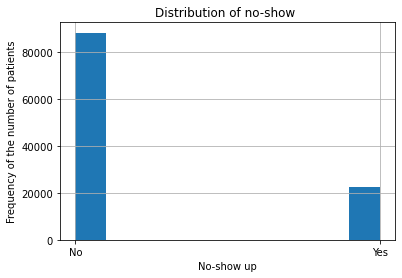

In [153]:
# histogram for pateint 'no-show' up for appointment general overview
df_no_show = df['no-show'].hist()
df_no_show.set(title='Distribution of no-show ', xlabel='No-show up', ylabel='Frequency of the number of patients');

> ##### Summary of the Findings
* Patient with **No** are more than those with **Yes** in the 'no-show' feature.
* Therefore, we can say that more patients showed up for appointment.

#### Find mean age for patients by no-show up feature

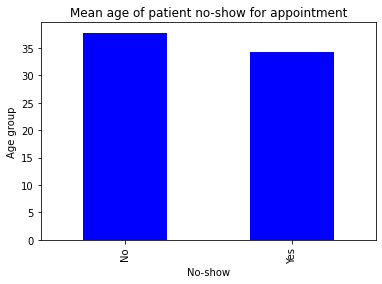

In [286]:
# Find the mean age of no-show with groupby
df_age_mean = df.groupby('no-show').mean()['age'].plot(kind='bar', colormap='brg', title='Mean age of patient no-show for appointment')
df_age_mean.set_xlabel('No-show')
df_age_mean.set_ylabel("Age group");

> ##### Summary of the Findings
* Mean age of patient with **No** is greater mean age of patient with a **Yes**
* Therefore, we can say that more elderly patients showed up for appointment than the younger patients.

### Research Question 2  (Does female(F) gender  shows up for apointment than Male(M)?)

#### Gender distribution- counts

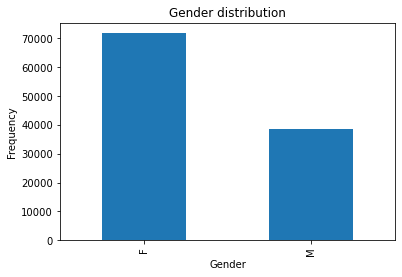

In [66]:
# gender distributions
# use the value_counts custom function
df_gender = value_counts('gender').plot( kind='bar')
df_gender.set_title('Gender distribution')
df_gender.set_xlabel('Gender')
df_gender.set_ylabel('Frequency');

> ##### Summary of the Findings
* Patient with **F** are more than those with **M** in the **gender** feature.
* Therefore, we can say that more **Female** patients are recorded in the dataset than **Male** patients.

#### Find the gender distribution of no-show

##### Gender **no-show** custom function 
Helps in finding gender showed up for appointment and gender not showed up for appointment

In [81]:
def gender_no_showup(status, color):
    df_gender_show = df[df['no-show']==status]['gender'].hist(color=color);
    df_gender_show.set_title('Gender distribution by show-up');
    df_gender_show.set_xlabel('Gender');
    df_gender_show.set_ylabel('Frequency of showed up');


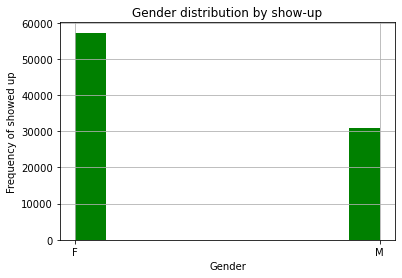

In [82]:
# most gender that showed up
# call the gender_no_showup custom function required args
gender_no_showup('No', 'green')

> ##### Summary of the Findings
* Patient with **F** gender are more than those with **M** gender in the **no-show** feature.
* Therefore, we can say that more **Female** patients ***showed up*** for appointment than **Male**.

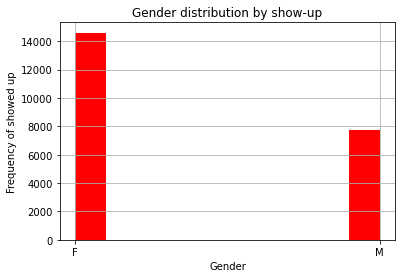

In [83]:
# most gender that didn't show up,
# call the gender_no_showup custom function required args
gender_no_showup('Yes', 'red')

> ##### Summary of the Findings
* Patient with **F** gender are more than those with **M** gender in the **no-show** feature.
* Therefore, we can say that more **Female** patients ***did not showed up*** for appointment than **Male**.

### Research Question 3  (Does older female with scholarships shows up for appointment than older male with scholarships?)

> Definitions
* 1 implies people with scholarships
* 0 implies people without scholarships
* F - implies Female
* M - implies Male
* No - implies patient who showed up for appointment
* Yes - implies patient who did not show up for appoint

#### Find the mean Age distribution by no-show, gender, and scholarship

##### Declare reusable charts variables

In [95]:
# variables declarations
NSGS = ['no-show','gender','scholarship']
title_text = 'Mean Age distribution by no-show, gender, and scholarship features'
xlabel = 'now-show. gender, scholarship'
ylabel ='Age Group'


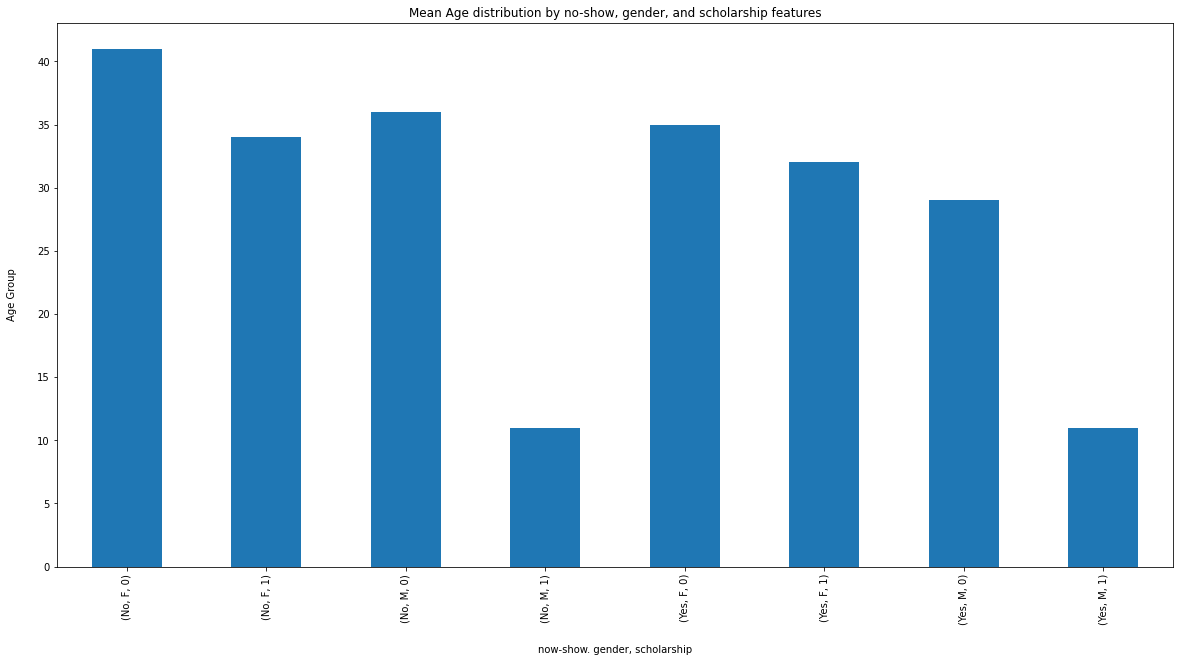

In [100]:
# bar chart showing age distribution by no-show, gender, and scholarship
# NSGS, title_text, ylabel variables declared above cells

df_noshow_age_gender_sch = df.groupby(NSGS).median()['age'].plot(kind='bar',figsize=(20,10))
df_noshow_age_gender_sch.set(xlabel =xlabel, ylabel =ylabel, title=title_text);

df_noshow_age_gender_sch.yaxis.labelpad = 20;
df_noshow_age_gender_sch.xaxis.labelpad = 20;

> ##### Summary of the Findings
* Patient with **(No,F,0)** are more than any other categorization.
* Therefore, we can say  More **elderly** **Female** patients **without scholarship** **showed up** for appointment than the rest.


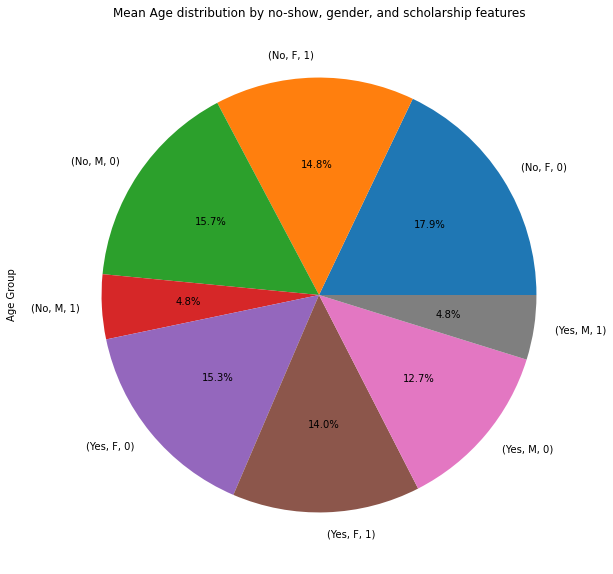

In [99]:
# pie chart showing age distribution by no-show, gender, and scholarship
# NSGS, title_text, ylabel variables declared above cells

df_noshow_age_gender_sch = df.groupby(NSGS).median()['age'].plot(kind='pie',autopct='%.1f%%',figsize=(10,10))
df_noshow_age_gender_sch.set(xlabel ='', ylabel =ylabel, title=title_text);
df_noshow_age_gender_sch.yaxis.labelpad = 30;


> ##### Summary of the Findings
* Patient with **(No,F,0)** are more than any other categorization.
>> Therefore, we can say, 
>>1. More **elderly** **Female** patients **without scholarship** **showed up** for appointment than the rest.
>>2. **Elderly** **Female** patients **without scholarship** **showed up** for appointment more than **Elderly** **Female** pateints **with scholarship**.
>>3. Both number of younger male patients with scholarship had equal number of ***show up*** and ***no show up*** for appointment ie ***(No,M,1)*** vs ***(Yes,M,1)***.

<a id='conclusions'></a>
## Conclusions

> **Age**: Patient with old age shows up for appointment than younger ones.

> **Gender**: Female gender were the most who showed up for appointment, as well as not showed up for appointment
>> * Female were the most patient who showed up for appointment compared to male patient,
>> * Female were also the most patient who did not show up for appointment compared to male patient.

> **Age by gender and Scholarships**: 
>> Elderly female without scholarships were the most patient who showed up for appointment.

>> To answer the question `Does older female with scholarships shows up for appointment than older male with scholarships?`,
    We can see that in the pie chart above,
>>> * Elderly Female with scholarships (NO, F , 1) = 14.8%
>>> * Elderly male with scholarships (NO, M , 1) = 4.8%.
>>> * So Yes, Older female with scholarships turn up for appointment than older male with scholarship

> **Further Research**: The Analysis has was peformed againt age, gender, and scholarship variables, and further areas to improve on is to check `no-show` for appointment against combination of variables like alcoholism, hipertension,diabetes, etc

> **Limitation**: 
>>* The dataset neighbourhood feature would not be used, beacuse there was no information about distance between the patient's location and the hospital location(neighbourhood). 
>>* Also the neighbourhood feature is stored in text(strinig), and can not be aggregated to mean.
>>* It also totals to 81 unique values, and makes it difficult to groupby and perform analysis to answer whether a patient shows up for appointment or not.